<a href="https://colab.research.google.com/github/Suyash018/AI_Course_VIT/blob/main/AI_da2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence

# DA-2

> Suyash Agarwal
20BBS0123



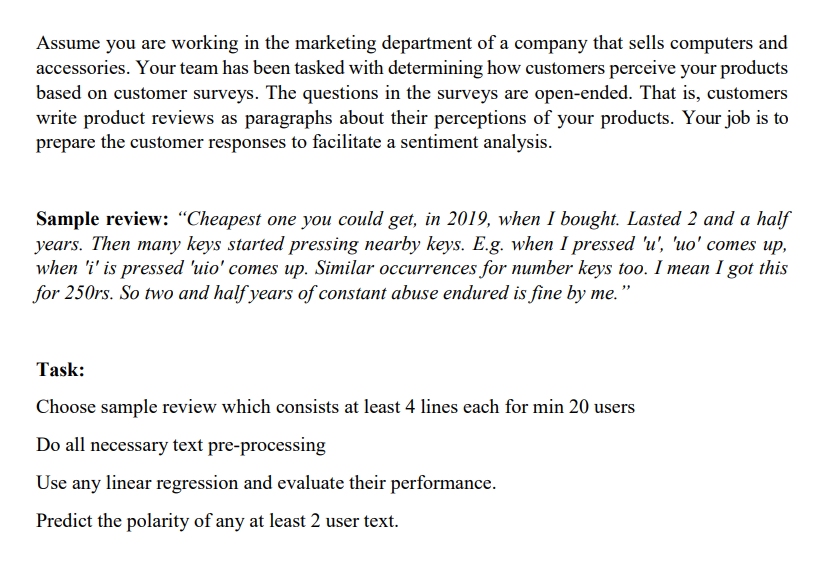

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

data = pd.read_csv("/content/book.csv")
data.head()

**Preprocessing**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


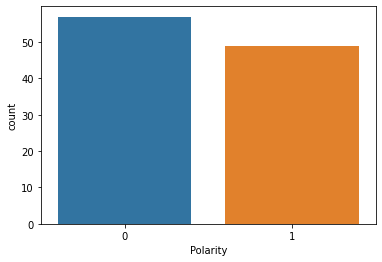

In [ ]:
sns.countplot(data.Polarity)
data['Review'] = data['Review'].str.strip().str.lower()

In [ ]:
data['Review']=data.Review.str.replace('[^\w\s]', '')
x = data['Review']
y = data['Polarity']

vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**Fiting the model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
print(model.fit(x_train, y_train))
y_pred =model.predict(x_test)
model.score(x_test, y_test)

MultinomialNB()


0.78125

**check the precision of the model**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
model.predict(vec.transform([ 'good customer service and easy to use']))


[[17  3]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.73      0.67      0.70        12

    accuracy                           0.78        32
   macro avg       0.77      0.76      0.76        32
weighted avg       0.78      0.78      0.78        32



array([1])

**function to convert prediction to expression**

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")



**checking the model with custom input**

In [ ]:
def sentiment_predictor(input):
    transformed_input = vec.transform(input)
    prediction = model.predict(transformed_input)
    expression_check(prediction)

input1 = ["Good product and nice product"]
input2 = ["Very bad service"]


sentiment_predictor(input1)
sentiment_predictor(input2)


Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
